In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from google.colab import drive
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 14, 7

In [3]:
df = pd.read_csv('/content/CHDdata diagnosis.csv')
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [4]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 462
Total number of columns in dataset = 10


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.iloc[:,4])
list(le.classes_)
df.iloc[:,4]=le.transform(df.iloc[:,4])

#df

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#x_train.iloc[0:4,:]

In [9]:
#j = sns.jointplot("X1", "X2", data = df, kind = 'reg')
#j.annotate(stats.pearsonr)
#plt.show()

In [10]:
target_col = "chd"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

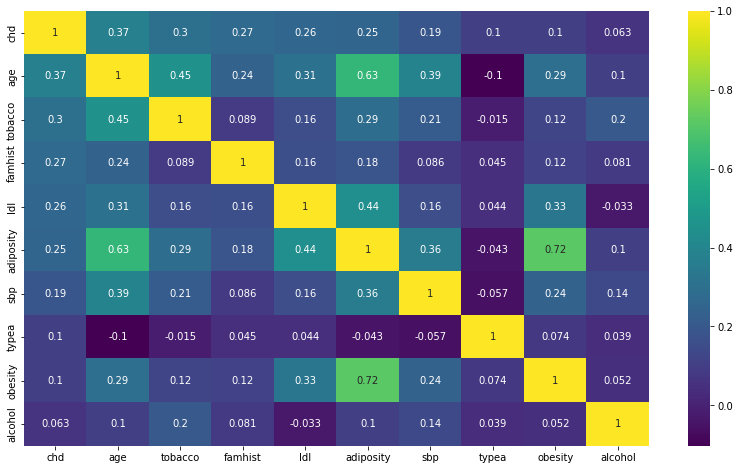

In [11]:
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, target_col)[target_col].index
cm = df[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [12]:
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

In [13]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    chd   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     15.51
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           3.92e-22
Time:                        08:58:51   Log-Likelihood:                -250.21
No. Observations:                 462   AIC:                             520.4
Df Residuals:                     452   BIC:                             561.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5080      0.205     -2.483      0.0

In [14]:
lasso = Lasso()
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [15]:
lasso_regressor = GridSearchCV(lasso, params, 
                               scoring="neg_mean_squared_error", 
                               cv=5)

In [16]:
lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             scoring='neg_mean_squared_error')

In [17]:
lasso_regressor.best_score_

-0.18286287445636612

In [18]:
lasso_regressor.best_estimator_

Lasso(alpha=0.001)

In [19]:
lasso_best = lasso_regressor.best_estimator_

In [20]:
lasso_best.fit(X, y)

Lasso(alpha=0.001)

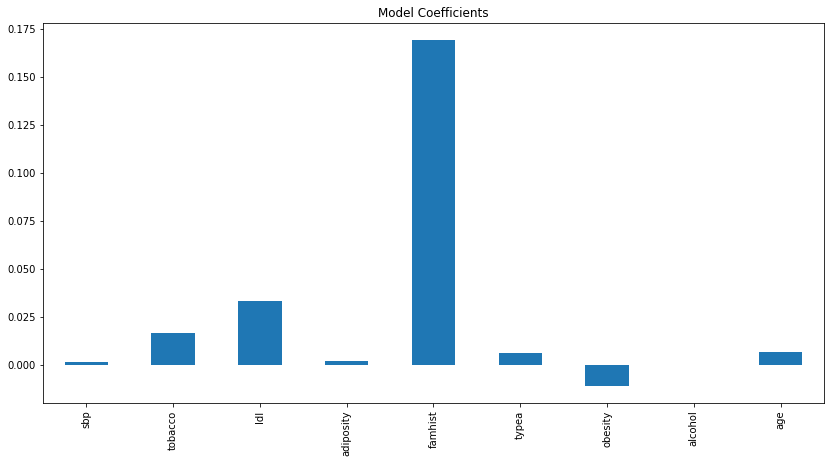

In [21]:
coef = pd.Series(lasso_best.coef_,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')